# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** CNNs for computer vision



# Intuition of CCN vs. a fully connected NNs
<hr style = "border:2px solid black" ></hr>

In [2]:
"""
In a fully connected neural network, which is also called a dense layer, every node from one layer is 
connected to every other node in the subsequent layer.
"""

'\nIn a fully connected neural network, which is also called a dense layer, every node from one layer is \nconnected to every other node in the subsequent layer.\n'

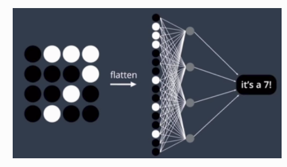

In [3]:
"""
A CNN leverages the spatial structure between the pixels to reduce the number of connections between two 
layers, significantly improving the speed of training while at the same time reducing the model parameters.
A CNN picks up features from an input image using a filter; a CNN with a sufficient number of filters detects 
various features in the image. These filters become more and more sophisticated in detecting complex features
as we move more and more toward the later layers. Convolutional networks use these filters and map them one by
one to create a map of feature occurrences.
"""

'\nA CNN leverages the spatial structure between the pixels to reduce the number of connections between two \nlayers, significantly improving the speed of training while at the same time reducing the model parameters.\nA CNN picks up features from an input image using a filter; a CNN with a sufficient number of filters detects \nvarious features in the image. These filters become more and more sophisticated in detecting complex features\nas we move more and more toward the later layers.\xa0Convolutional networks use these filters and map them one by\none to create a map of feature occurrences.\n'

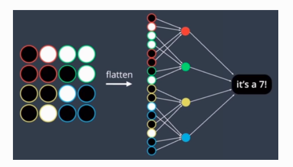

# Import modules
<hr style = "border:2px solid black" ></hr>

In [4]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim

# Convolution -> padding + stride
<hr style = "border:2px solid black" ></hr>

In [5]:
"""
(3, 16, 3) where in the first parameter is the number of channel. 3 for a coloured image and 1 for a grey-scale image
The second parameter is the number of outputs channles = 16. This layer has a square kernel of size 3 x 3 with a 
default stride of 1 in its height and width.
"""

'\n(3, 16, 3) where in the first parameter is the number of channel. 3 for a coloured image and 1 for a grey-scale image\nThe second parameter is the number of outputs channles = 16. This layer has a square kernel of size 3 x 3 with a \ndefault stride of 1 in its height and width.\n'

In [6]:
nn.Conv2d(3, 16, 3)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [7]:
nn.Conv2d(3, 16, 3, padding=1)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [8]:
nn.Conv2d(3, 16, 3, stride=2, padding=(1,2))

Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 2))

In [9]:
nn.Conv2d(3, 16, (3,4), padding=1)

Conv2d(3, 16, kernel_size=(3, 4), stride=(1, 1), padding=(1, 1))

In [10]:
nn.Conv2d(3, 16, (3,4), padding=(1,4))

Conv2d(3, 16, kernel_size=(3, 4), stride=(1, 1), padding=(1, 4))

In [11]:
nn.Conv2d(3, 16, (3,4), stride=(3,3), padding=(1,2))

Conv2d(3, 16, kernel_size=(3, 4), stride=(3, 3), padding=(1, 2))

In [12]:
nn.Conv2d(3, 16, (3,4), stride=3, padding=(1,2))

Conv2d(3, 16, kernel_size=(3, 4), stride=(3, 3), padding=(1, 2))

# Convolution pooling
<hr style = "border:2px solid black" ></hr>

In [13]:
"""
The pooling layer is used to reduce the spatial dimension of an input, preserving its depth. As we move from
the initial layer to the later layers in a CNN, we want to identify more conceptual meaning in the image 
compared to actual pixel by pixel information, and so we want to identify and keep key pieces of information
from the input and throw away the rest. A pooling layer helps us do that.
"""

'\nThe pooling layer is used to reduce the spatial dimension of an input, preserving its depth. As we move from\nthe initial layer to the later layers in a CNN, we want to identify more conceptual meaning in the image \ncompared to actual pixel by pixel information, and so we want to identify and keep key pieces of information\nfrom the input and throw away the rest. A pooling layer helps us do that.\n'

In [14]:
nn.Conv2d(3, 16, 3)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [15]:
nn.Conv2d(3, 16, 3, stride=2)

Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))

In [16]:
max_pool = nn.MaxPool2d(3, stride=1)

In [17]:
a = torch.FloatTensor(3,5,5).random_(0, 10)

In [18]:
a

tensor([[[9., 6., 7., 5., 4.],
         [5., 9., 2., 5., 0.],
         [6., 7., 8., 7., 4.],
         [6., 5., 8., 4., 6.],
         [5., 3., 3., 9., 0.]],

        [[7., 9., 8., 6., 8.],
         [7., 1., 0., 2., 6.],
         [4., 2., 9., 3., 2.],
         [9., 2., 3., 2., 7.],
         [5., 5., 3., 3., 0.]],

        [[4., 4., 6., 4., 2.],
         [9., 4., 0., 9., 0.],
         [8., 7., 8., 1., 1.],
         [6., 3., 5., 8., 7.],
         [6., 9., 3., 1., 7.]]])

In [19]:
max_pool(a)

tensor([[[9., 9., 8.],
         [9., 9., 8.],
         [8., 9., 9.]],

        [[9., 9., 9.],
         [9., 9., 9.],
         [9., 9., 9.]],

        [[9., 9., 9.],
         [9., 9., 9.],
         [9., 9., 8.]]])

In [20]:
avg_pool = nn.AvgPool2d(3, stride=1)

In [21]:
avg_pool(a)

tensor([[[6.5556, 6.2222, 4.6667],
         [6.2222, 6.1111, 4.8889],
         [5.6667, 6.0000, 5.4444]],

        [[5.2222, 4.4444, 4.8889],
         [4.1111, 2.6667, 3.7778],
         [4.6667, 3.5556, 3.5556]],

        [[5.5556, 4.7778, 3.4444],
         [5.5556, 5.0000, 4.3333],
         [6.1111, 5.0000, 4.5556]]])

# Exploring transforms
<hr style = "border:2px solid black" ></hr>

In [22]:
"""
PyTorch cannot process an image pixel directly and needs to have the contents as tensors. To get around this, 
torchvision, being a specialized library for vision and image-related tasks, provides a module called transform,
which provides APIs for converting pixels into tensors, normalizing standard scaling, and so on.
"""

'\nPyTorch cannot process an image pixel directly and needs to have the contents as tensors. To get around this, \ntorchvision, being a specialized library for vision and image-related tasks, provides a module called\xa0transform,\nwhich provides APIs for converting pixels into tensors, normalizing standard scaling, and so on.\n'

In [23]:
# Transforms a given input image into a tensor
transforms.ToTensor()

ToTensor()

In [24]:
transforms.Resize(1)

Resize(size=1, interpolation=PIL.Image.BILINEAR)

In [25]:
transforms.Resize((1,1))

Resize(size=(1, 1), interpolation=PIL.Image.BILINEAR)

In [26]:
transforms.Pad(1, 0)

Pad(padding=1, fill=0, padding_mode=constant)

In [27]:
transforms.Pad((1, 2), 1)

Pad(padding=(1, 2), fill=1, padding_mode=constant)

In [28]:
transforms.Pad((1, 2, 2, 3), padding_mode='reflect')

Pad(padding=(1, 2, 2, 3), fill=0, padding_mode=reflect)

In [29]:
# First tuple is the sequence of the means of each channel in the input image 
# Second tuple is the sequence of the standard deviation for each channel
transforms.Normalize((0.5,),(0.5,))

Normalize(mean=(0.5,), std=(0.5,))

In [30]:
transforms.Compose([
     transforms.CenterCrop(10),
     transforms.ToTensor(),
])

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

In [31]:
transforms.CenterCrop(10)

CenterCrop(size=(10, 10))

# Performing data augmentation
<hr style = "border:2px solid black" ></hr>

In [32]:
"""
Data augmentation increases the diversity of data for training the model by creating variations from the
original images without actually collecting new data. This prevents models from memorizing the limited
amount of data rather than making generalizations about the observed data. 
"""

'\nData augmentation increases the diversity of data for training the model by creating variations from the\noriginal images without actually collecting new data. This prevents models from memorizing the limited\namount of data rather than making generalizations about the observed data.\xa0\n'

In [33]:
transforms.RandomCrop(10)

RandomCrop(size=(10, 10), padding=None)

In [34]:
transforms.RandomCrop((10, 20))

RandomCrop(size=(10, 20), padding=None)

In [35]:
transforms.RandomHorizontalFlip(p=0.3)

RandomHorizontalFlip(p=0.3)

In [36]:
transforms.RandomVerticalFlip(p=0.3)

RandomVerticalFlip(p=0.3)

In [37]:
transforms.ColorJitter(0.25, 0.25, 0.25, 0.25)

ColorJitter(brightness=[0.75, 1.25], contrast=[0.75, 1.25], saturation=[0.75, 1.25], hue=[-0.25, 0.25])

In [38]:
transforms.RandomRotation(10)

RandomRotation(degrees=[-10.0, 10.0], resample=False, expand=False)

In [39]:
# Transformation pipeline
transforms.Compose([
     transforms.RandomRotation(10),
     transforms.ToTensor(),
])

Compose(
    RandomRotation(degrees=[-10.0, 10.0], resample=False, expand=False)
    ToTensor()
)

#  CNN applied to the CIFAR-10 dataset
<hr style = "border:2px solid black" ></hr>


- The CIFAR-10 dataset, which consists of 60,000 32 x 32 pixel colored images for each of the 10 classes in the 
dataset. These classes are Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, and Truck.

- We performed a horizontal flip for some of the images at random and also added rotation to some of the images at
random, with a range of -20 to 20 degrees. We converted the images into tensors. We set the mean and standard 
deviation for each of the red, green, and blue channels.

- **WHY DO WE NORMALISE?** Normalizing is important because a lot of multiplication will be happening as the input passes through the layers of the neural network and keeping the incoming values between 0 and 1 prevents the values from getting too large during the training phase (known as the exploding gradient problem). 



In [42]:
transformations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])

In [43]:
train_data = datasets.CIFAR10('CIFAR10', train=True, download=True, transform=transformations)

Files already downloaded and verified


In [44]:
test_data = datasets.CIFAR10('CIFAR10', train=False, download=True, transform=transformations)

Files already downloaded and verified


In [45]:
len(train_data), len(test_data)

(50000, 10000)

In [46]:
# We will select 20% of the training data as validation data
validation_size = 0.2

In [47]:
training_size = len(train_data)

In [48]:
"""
Create a list of indices which are the shuffled. We randomly picked 20% of the training set to create 
a validation set so that the validation set is not skewed to a certain class of animal.
"""

'\nCreate a list of indices which are the shuffled. We randomly picked 20% of the training set to create \na validation set so that the validation set is not skewed to a certain class of animal.\n'

In [49]:

indices = list(range(training_size))
np.random.shuffle(indices)

In [50]:
index_split = int(np.floor(training_size * validation_size))

In [51]:
validation_indices, training_indices = indices[:index_split], indices[index_split:]

In [52]:
training_sample = SubsetRandomSampler(training_indices)
validation_sample = SubsetRandomSampler(validation_indices)

In [53]:
batch_size = 16

In [54]:
# We will then use the dataloader module in PyTorch to load our data into batches

In [55]:
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=training_sample)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=validation_sample)
test_loader = DataLoader(train_data, batch_size=batch_size)

In [56]:
"""
FIRST CONVOLUTION LAYER: the number of input channels was 3 (RGB), and the number of output channels was 
defined as 16 and had a square kernel size of 3.

SECOND CONVOLUTION LAYER: took in the tensors from the previous layer and had 16 input channels and 32 
output channels with a kernel size of 3 x 3.

THIRD CONVOLUTION LAYER: had 32 input channels and 64 output channels with a 3 x 3 kernel.

MAX POOLING LAYER and used a kernel size of 2 and a stride of 2.

WE FLATTEN (view()) flatten the three dimensions of the tensor into one dimension so that it could be passed
into a fully connected network.

FIRST LINER LAYER we had 1,024 inputs (obtained from flattening the 64 x 4 x 4 tensor after the max pool)
and 512 outputs. 

SECOND LINEAR LAYER we had 512 inputs and 10 outputs, representing the number of output classes. 

DROPOUT LAYER for our fully connected layer with a probability of 0.3
"""

'\nFIRST CONVOLUTION LAYER: the number of input channels was 3 (RGB), and the number of output channels was \ndefined as 16 and had a square kernel\xa0size\xa0of 3.\n\nSECOND CONVOLUTION LAYER: took in the tensors from the previous layer and had 16 input channels and\xa032\xa0\noutput channels with a kernel size of 3 x 3.\n\nTHIRD CONVOLUTION LAYER: had 32 input channels and\xa064\xa0output channels with a 3 x 3 kernel.\n\nMAX POOLING LAYER and used a kernel size of 2 and a stride of 2.\n\nWE FLATTEN (view()) flatten the three dimensions of the tensor into one dimension so that it could be passed\ninto a fully connected network.\n\nFIRST LINER LAYER we had 1,024 inputs (obtained from flattening\xa0the\xa064 x 4 x 4 tensor after the max pool)\nand 512 outputs. \n\nSECOND LINEAR LAYER we had 512 inputs and 10 outputs, representing the number of output classes. \n\nDROPOUT LAYER for our fully connected layer with a probability of 0.3\n'

In [57]:
"""
If the above was the description of each single element of the network, here is the description of how the model
is executed.


We set batch tp 16 each with the dimensions of 32 x 32 x 3 (pixels resolution + RGB scae)

The following sequential step are performed:

[1] apply first convolutional layer
[2] apply ReLU non-linear activation function
[3] apply max pooling layer to form an output tensor with the dimensions of 16 x 16 x 16, 

[4] apply second convolutional layer
[5] apply ReLU non-linear activation function
[6] apply max pool layer, with an output with the dimensions of 8 x 8 x 32

[7] apply third convolutional layer
[8] apply ReLU non-linear activation function
[9] apply max pool layer, with the dimensions of 4 x 4 x 64. 

[10] flat the image out to a vector of 1,024 elements 
[11] apply dropout layer into the first fully connected layer, giving us 512 outputs
[12] apply ReLU non linear activation function
[13] apply  dropout into the final fully connected layer giving 10 outputs
"""

'\nIf the above was the description of each single element of the network, here is the description of how the model\nis executed.\n\n\nWe set batch tp 16 each with the dimensions of 32 x 32 x 3 (pixels resolution + RGB scae)\n\nThe following sequential step are performed:\n\n[1] apply first convolutional layer\n[2] apply ReLU\xa0non-linear activation function\n[3] apply max pooling layer to form an output tensor with the dimensions of 16 x 16 x 16, \n\n[4] apply second convolutional layer\n[5] apply ReLU non-linear activation function\n[6] apply max pool layer, with an output with the dimensions of 8 x 8 x 32\n\n[7] apply third convolutional layer\n[8] apply ReLU non-linear activation function\n[9] apply max pool layer, with the dimensions of 4 x 4 x 64. \n\n[10] flat the image out to a vector of 1,024 elements \n[11] apply dropout layer into the first fully connected layer, giving us 512 outputs\n[12] apply ReLU non linear activation function\n[13] apply  dropout into the final fully 

In [58]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.linear1 = nn.Linear(64 * 4 * 4, 512)
        self.linear2 = nn.Linear(512, 10) 
        self.dropout = nn.Dropout(p=0.3)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        """
        The -1 in the view function ensured that the right size was automatically assigned to that dimension 
        by making sure that the number of elements before and after the view function remained the same, 
        which in this case was the batch size.
        """
        x = x.view(-1, 64 * 4 * 4)
        x = self.dropout(x)
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = self.linear2(x)
        return x

In [59]:
model = CNN()

In [60]:
model

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [62]:
device.type

'cpu'

In [63]:
model = model.to(device)

In [64]:
criterion = nn.CrossEntropyLoss()

In [65]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [66]:
n_epochs = 30

In [67]:
def accuracy(preds, y):
    _, pred = torch.argmax(preds, 1)
    correct = pred.eq(target.data.view_as(pred))
    acc = correct.sum()/len(correct)
    return acc

In [68]:
for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    
    """
    This the training phase where the model learn
    """
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        # Aggregate the loss in the batch
        train_loss += loss.item()*data.size(0)
    
    """
    This the evaluation phase where we evauate the performance
    but we are note learning! There is no optimiser step here.
    """
    model.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print(f'| Epoch: {epoch:02} | Train Loss: {train_loss:.3f} | Val. Loss: {valid_loss:.3f} |')

| Epoch: 01 | Train Loss: 2.060 | Val. Loss: 1.732 |
| Epoch: 02 | Train Loss: 1.649 | Val. Loss: 1.530 |
| Epoch: 03 | Train Loss: 1.496 | Val. Loss: 1.414 |
| Epoch: 04 | Train Loss: 1.405 | Val. Loss: 1.308 |
| Epoch: 05 | Train Loss: 1.332 | Val. Loss: 1.269 |
| Epoch: 06 | Train Loss: 1.272 | Val. Loss: 1.181 |
| Epoch: 07 | Train Loss: 1.222 | Val. Loss: 1.140 |
| Epoch: 08 | Train Loss: 1.178 | Val. Loss: 1.120 |
| Epoch: 09 | Train Loss: 1.145 | Val. Loss: 1.103 |
| Epoch: 10 | Train Loss: 1.108 | Val. Loss: 1.041 |
| Epoch: 11 | Train Loss: 1.073 | Val. Loss: 1.022 |
| Epoch: 12 | Train Loss: 1.051 | Val. Loss: 1.022 |
| Epoch: 13 | Train Loss: 1.029 | Val. Loss: 0.989 |
| Epoch: 14 | Train Loss: 0.999 | Val. Loss: 0.952 |
| Epoch: 15 | Train Loss: 0.981 | Val. Loss: 0.934 |
| Epoch: 16 | Train Loss: 0.959 | Val. Loss: 0.935 |
| Epoch: 17 | Train Loss: 0.944 | Val. Loss: 0.906 |
| Epoch: 18 | Train Loss: 0.932 | Val. Loss: 0.883 |
| Epoch: 19 | Train Loss: 0.909 | Val. Loss: 0

In [69]:
#torch.save(model.state_dict(), "cifar10.pth")

In [ ]:
"""
We have run a trained model and we need to evaluate the model on the holdout data, or the test data, which is 
the data that the model hasn't seen yet. By doing this, we can evaluate the true performance of the model. For
this, you will have to pass into the model test batches, and for each batch, you will have to perform _, 
prediction = torch.max(output, 1) to convert the softmax probabilities into actual predictions and compare 
the predictions with the true output label using prediction.eq(target.data.view_as(prediction)), where we ensure
that the dimensions of the prediction and output tensors are the same. This returns a tensor, which will contain
1 where they match and 0 where they don't. We could use this to calculate the accuracy of the model in each batch
and aggregate them over the entire test dataset.
"""

# References
<hr style = "border:2px solid black" ></hr>


- Jibin Mathew, PyTorch Artificial Intelligence Fundamentals
- https://github.com/jibinmathew69
    
